In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import re
import datetime

In [2]:
df = pd.read_csv('movie_sample_dataset.csv', encoding='utf-8')
df.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [3]:
df.shape

(99, 13)

In [4]:
df.drop(['color','language'], axis=1, inplace=True)

In [5]:
df.head()

,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
0,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
director_name           88 non-null object
duration                99 non-null int64
gross                   91 non-null float64
genres                  98 non-null object
movie_title             99 non-null object
title_year              99 non-null int64
country                 99 non-null object
budget                  95 non-null float64
imdb_score              99 non-null float64
actors                  99 non-null object
movie_facebook_likes    99 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 8.6+ KB


In [7]:
df.columns

Index(['director_name', 'duration', 'gross', 'genres', 'movie_title',
       'title_year', 'country', 'budget', 'imdb_score', 'actors',
       'movie_facebook_likes'],
      dtype='object')

In [8]:
df.isnull().sum()

director_name           11
duration                 0
gross                    8
genres                   1
movie_title              0
title_year               0
country                  0
budget                   4
imdb_score               0
actors                   0
movie_facebook_likes     0
dtype: int64

In [9]:
pd.set_option('display.max_rows', None)
df['director_name']

0          Martin Scorsese
1              Shane Black
2        Quentin Tarantino
3         Kenneth Lonergan
4            Peter Jackson
5                      NaN
6            Peter Jackson
7              Edward Hall
8              Joss Whedon
9              Joss Whedon
10              Tom Tykwer
11                    Null
12     Christopher Spencer
13       Christopher Nolan
14            F. Gary Gray
15       Richard Linklater
16       Quentin Tarantino
17             Michael Bay
18       Christopher Nolan
19           Peter Jackson
20              Tom Hooper
21              Tom Hooper
22         Kathryn Bigelow
23            Ridley Scott
24                     NaN
25             Michael Bay
26        Denis Villeneuve
27       Gnana Rajasekaran
28               Marc Webb
29                     Nan
30            Ridley Scott
31            Ridley Scott
32                     NaN
33              Mike Leigh
34          Gore Verbinski
35           David Fincher
36            Bryan Singer
3

In [10]:
df['director_name'] = np.where(df['director_name']=='N/A','', df['director_name'])
df['director_name'] = np.where(df['director_name']=='Nan','', df['director_name'])
df['director_name'] = np.where(df['director_name']=='Null','', df['director_name'])

In [11]:
df['duration'].unique()

array([240, 195, 187, 186, 183, -50, 180, 173, 172, 158, 170, 169, 167,
       165, 580, 164, 157, 156, 154, 153, 151, 150, 650, 149, 148, 147,
       146, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134,   5],
      dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x2ab5a972908>,
 'caps': [<matplotlib.lines.Line2D at 0x2ab5a977d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ab5a966fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x2ab5a977f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ab5a9840c8>],
 'means': []}

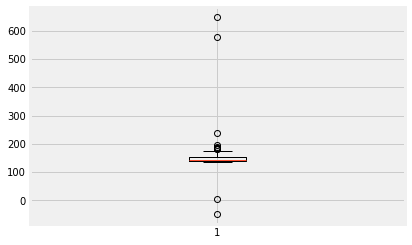

In [12]:
plt.boxplot(df["duration"])

In [13]:
df['gross'].unique()

array([1.16866727e+08, 4.08992272e+08, 5.41161910e+07, 4.64950000e+04,
       2.58355354e+08, 3.30249062e+08, 3.03001229e+08,            nan,
       6.23279547e+08, 2.70985800e+07, 1.02515793e+08, 5.96961760e+07,
       1.87991439e+08, 1.61029270e+08, 2.53592000e+07, 1.62804648e+08,
       2.45428137e+08, 4.48130642e+08, 2.55108370e+08, 1.48775460e+08,
       9.57207160e+07, 1.05219735e+08, 1.83635922e+08, 3.52358779e+08,
       6.09628780e+07, 2.62030663e+08, 2.28430993e+08, 6.50070450e+07,
       1.82204440e+08, 3.95850000e+06, 8.92899100e+07, 1.67735396e+08,
       2.33914986e+08, 2.92568851e+08, 8.09331800e+06, 2.00074175e+08,
       4.07197282e+08, 9.53289370e+07, 1.69705587e+08, 4.24645577e+08,
       7.98833590e+07, 5.28224180e+07, 4.12290000e+04, 1.63772740e+07,
       1.54985087e+08, 2.17531200e+06, 2.91021565e+08, 3.04360277e+08,
       1.44812796e+08, 7.23060650e+07, 2.02853933e+08, 4.07999255e+08,
       4.58991599e+08, 8.32474800e+06, 4.73075500e+07, 4.71050850e+07,
      

In [14]:
pd.set_option('display.max_rows', None)
df['gross']

0     116866727.0
1     408992272.0
2      54116191.0
3         46495.0
4     258355354.0
5     330249062.0
6     303001229.0
7             NaN
8     623279547.0
9     623279547.0
10     27098580.0
11    102515793.0
12     59696176.0
13    187991439.0
14    161029270.0
15     25359200.0
16    162804648.0
17    245428137.0
18    448130642.0
19    255108370.0
20    148775460.0
21    148775460.0
22     95720716.0
23    105219735.0
24    183635922.0
25    352358779.0
26     60962878.0
27            NaN
28    262030663.0
29    228430993.0
30     65007045.0
31     65007045.0
32    182204440.0
33      3958500.0
34     89289910.0
35    167735396.0
36    233914986.0
37            NaN
38    292568851.0
39      8093318.0
40    200074175.0
41    407197282.0
42     95328937.0
43    169705587.0
44    424645577.0
45     79883359.0
46     52822418.0
47        41229.0
48     16377274.0
49    154985087.0
50      2175312.0
51    291021565.0
52    304360277.0
53    304360277.0
54    144812796.0
55    1448

In [15]:
df['genres'].unique()

array(['Biography|Comedy|Crime|Drama', 'Action|Adventure|Sci-Fi',
       'Crime|Drama|Mystery|Thriller|Western', 'Drama',
       'Adventure|Fantasy', 'Drama|Romance', 'Drama|Sci-Fi',
       'Crime|Drama|Mystery|Thriller', nan, 'Adventure|Drama|Sci-Fi',
       'Biography|Crime|Drama|History|Music', 'Drama|Western',
       'Action|Thriller', 'Drama|Musical|Romance',
       'Drama|History|Thriller', 'Action|Adventure|Drama|History',
       'Adventure|Drama|Thriller|Western', 'Biography|Drama|History',
       'Action|Adventure|Fantasy', 'Action|Adventure|Drama',
       'Biography|Drama|History|War', 'Action|Adventure|Western',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Action|Animation|Crime|Sci-Fi|Thriller',
       'Action|Adventure|Sci-Fi|Thriller',
       'Comedy|Crime|Drama|Mystery|Romance', 'Action|Adventure|Thriller',
       'Comedy|Drama|Romance', 'Adventure|Sci-Fi|Thriller', 'Drama|War',
       'Action|Drama|Thriller|War', 'Crime|Drama|Thriller', 'Comedy',
       'A

In [16]:
pd.set_option('display.max_rows', None)
df['genres']

0                 Biography|Comedy|Crime|Drama
1                      Action|Adventure|Sci-Fi
2         Crime|Drama|Mystery|Thriller|Western
3                                        Drama
4                            Adventure|Fantasy
5                      Action|Adventure|Sci-Fi
6                            Adventure|Fantasy
7                                Drama|Romance
8                      Action|Adventure|Sci-Fi
9                      Action|Adventure|Sci-Fi
10                                Drama|Sci-Fi
11                Crime|Drama|Mystery|Thriller
12                                         NaN
13                      Adventure|Drama|Sci-Fi
14         Biography|Crime|Drama|History|Music
15                                       Drama
16                               Drama|Western
17                     Action|Adventure|Sci-Fi
18                             Action|Thriller
19                           Adventure|Fantasy
20                       Drama|Musical|Romance
21           

In [17]:
df['genres'].fillna('General', inplace=True)

In [18]:
df['title_year'].unique()

array([2013, 2015, 2011,  202, 2012, 2014, 2010, 2016,  205], dtype=int64)

(90.0, 3000.0)

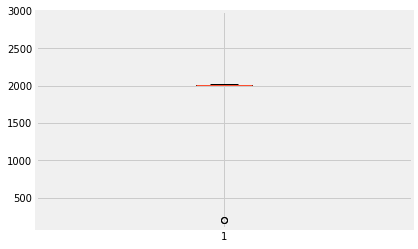

In [19]:
plt.boxplot(df["title_year"])
plt.ylim([90,3000])

In [20]:
df['title_year'] = np.where(df['title_year']=="202","2002", df['title_year'])
df['title_year'] = np.where(df['title_year']=="205","2005", df['title_year'])

C:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [21]:
pd.set_option('display.max_rows', None)
df['title_year']

0     2013
1     2013
2     2015
3     2011
4     2013
5      202
6     2012
7     2012
8     2012
9     2012
10    2012
11    2011
12    2014
13    2014
14    2015
15    2014
16    2012
17    2014
18    2012
19    2014
20    2012
21    2012
22    2012
23    2010
24    2015
25    2011
26    2013
27    2014
28    2012
29    2015
30    2014
31    2014
32    2012
33    2014
34    2013
35    2014
36    2014
37    2013
38    2010
39    2014
40    2015
41    2016
42    2010
43    2011
44    2013
45    2011
46    2016
47    2013
48    2012
49    2016
50    2013
51    2013
52    2012
53    2012
54    2013
55    2013
56    2011
57    2015
58    2014
59    2012
60    2015
61    2016
62    2016
63    2016
64    2013
65    2012
66    2014
67    2010
68    2015
69    2012
70    2011
71    2014
72    2016
73    2014
74    2011
75    2013
76    2012
77    2014
78    2010
79    2013
80    2013
81    2005
82    2011
83    2012
84    2015
85    2014
86    2014
87    2014
88    2014
89    2011
90    2012

In [22]:
df['country'].unique()

array(['USA', 'usa', 'UK', 'Germany', 'New Zealand', 'India',
       'United States', 'France', 'Australia', 'Czech Republic',
       'Kyrgyzstan', 'Canada'], dtype=object)

In [23]:
df['country'] = df['country'].str.upper()
df['country'] = np.where(df['country']=='UNITED STATES','USA', df['country'])

In [24]:
df['country'].unique()

array(['USA', 'UK', 'GERMANY', 'NEW ZEALAND', 'INDIA', 'FRANCE',
       'AUSTRALIA', 'CZECH REPUBLIC', 'KYRGYZSTAN', 'CANADA'],
      dtype=object)

In [25]:
df['budget'].unique()

array([1.000e+08, 2.000e+08, 4.400e+07, 1.400e+07, 2.250e+08, 2.500e+08,
       1.800e+08,       nan, 2.200e+08, 1.020e+08, 9.000e+07, 2.200e+07,
       1.650e+08, 2.800e+07, 4.000e+06, 2.100e+08, 6.100e+07, 4.000e+07,
       1.350e+08, 1.950e+08, 4.600e+07, 2.300e+08, 1.080e+08, 1.400e+08,
       6.500e+07, 2.150e+08, 3.500e+06, 1.600e+08, 2.000e+07, 2.450e+08,
       2.500e+07, 1.300e+08, 6.600e+07, 5.000e+07, 2.550e+07, 3.200e+07,
       1.780e+08, 1.050e+08, 1.735e+04, 7.800e+07, 3.500e+07, 4.500e+07,
       6.000e+07, 1.900e+08, 1.500e+07, 8.500e+07, 3.000e+07, 3.100e+07,
       1.250e+08, 8.000e+07, 1.200e+08, 1.700e+08, 7.500e+07, 7.000e+07,
       1.400e+06, 5.500e+07, 6.800e+07])

In [26]:
pd.set_option('display.max_rows', None)
df['budget']

0     100000000.0
1     200000000.0
2      44000000.0
3      14000000.0
4     225000000.0
5     250000000.0
6     180000000.0
7             NaN
8     220000000.0
9     220000000.0
10    102000000.0
11     90000000.0
12     22000000.0
13    165000000.0
14     28000000.0
15      4000000.0
16    100000000.0
17    210000000.0
18    250000000.0
19    250000000.0
20     61000000.0
21     61000000.0
22     40000000.0
23    200000000.0
24    135000000.0
25    195000000.0
26     46000000.0
27            NaN
28    230000000.0
29    108000000.0
30    140000000.0
31    140000000.0
32     65000000.0
33            NaN
34    215000000.0
35     61000000.0
36    200000000.0
37      3500000.0
38    160000000.0
39     20000000.0
40    245000000.0
41    250000000.0
42    100000000.0
43     25000000.0
44    130000000.0
45     66000000.0
46     50000000.0
47     25500000.0
48     32000000.0
49    178000000.0
50     50000000.0
51    225000000.0
52    200000000.0
53    200000000.0
54    105000000.0
55    1050

In [27]:
df['budget'].fillna(0, inplace=True)

In [28]:
df['imdb_score'].unique()

array([ 8.2,  7.2,  7.9,  6.5,  6.9,  8.1, -7.5,  7.8,  5.6,  8.6,  8. ,
        8.5,  5.7,  7.5,  7.6,  7.4,  6.7,  6.3,  7. ,  6.1,  6.8,  8.4,
        8.8,  4.3,  7.1,  7.3,  3. ,  6. ,  5.8,  5.3,  6.4,  6.6, -1.2,
        5.9,  8.7])

(-10.0, 10.0)

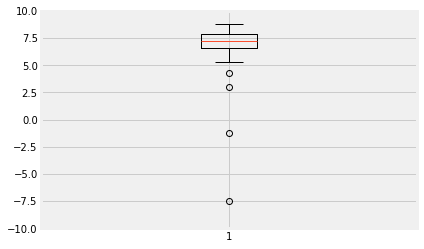

In [29]:
plt.boxplot(df["imdb_score"])
plt.ylim([-10,10])

In [30]:
df['imdb_score'] = np.where(df['imdb_score']=="-7.5","7.5", df['imdb_score'])
df['imdb_score'] = np.where(df['imdb_score']=="-1.2","1.2", df['imdb_score'])

C:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [31]:
df['imdb_score'].unique()

array(['8.2', '7.2', '7.9', '6.5', '6.9', '8.1', '-7.5', '7.8', '5.6',
       '8.6', '8.0', '8.5', '5.7', '7.5', '7.6', '7.4', '6.7', '6.3',
       '7.0', '6.1', '6.8', '8.4', '8.8', '4.3', '7.1', '7.3', '3.0',
       '6.0', '5.8', '5.3', '6.4', '6.6', '1.2', '5.9', '8.7'],
      dtype=object)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
director_name           88 non-null object
duration                99 non-null int64
gross                   91 non-null float64
genres                  99 non-null object
movie_title             99 non-null object
title_year              99 non-null object
country                 99 non-null object
budget                  99 non-null float64
imdb_score              99 non-null object
actors                  99 non-null object
movie_facebook_likes    99 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 8.6+ KB


In [33]:
df.isnull().sum()

director_name           11
duration                 0
gross                    8
genres                   0
movie_title              0
title_year               0
country                  0
budget                   0
imdb_score               0
actors                   0
movie_facebook_likes     0
dtype: int64